# Proyek Analisis Data: [Bike-sharing-dataset]

**Nama:**  [Wahyu Ozorah Manurung]

**Email:**  [wahyuozorahmanurung@gmail.com]

**ID Dicoding:**  [MC189D5Y0409]


## Menentukan Pertanyaan Bisnis



- Bagaimana pola penggunaan sepeda berdasarkan waktu (weakday dan hour)?

- Apa Hubungan antara Jumlah Penyewaan Sepeda dan Faktor Demografis Pengguna setiap hari dalam seminggu?

- Pada Bulan Apa terjadinya peningkatan penyewaan sepeda dan apakah cuaca cukup berperan?

- Bagaimana distribusi penyewaan sepeda berdasarkan rentang suhu?

## Import Semua Packages/Library yang Digunakan

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
file_path = 'D:\submission\data\day.csv'
day_df = pd.read_csv(file_path)
print(day_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [3]:
file_path = 'D:\submission\data\hour.csv'
hour_df = pd.read_csv(file_path)
print(hour_df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**

Berdasarkan struktur tabel yang ditampilkan, setiap tabel memiliki sejumlah variabel, seperti tanggal, musim, tahun, bulan, jam penggunaan, kategori kondisi cuaca, suhu, kelembapan, kecepatan angin, jumlah pengguna, serta total penyewaan sepeda.  

- Tabel harian merekam data peminjaman sepeda berdasarkan hari, sementara tabel per jam mencatat jumlah penyewaan pada tiap jam dalam sehari.  
- Dari data tersebut, dapat terlihat bahwa faktor-faktor seperti musim, cuaca, status hari kerja atau libur, serta waktu dalam sehari memiliki pengaruh terhadap jumlah sepeda yang disewa.

### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# untuk melihat apakah ada duplikasi atau tidak

print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**

- Dalam tabel Day (harian), terdapat ketidaksesuaian tipe data pada kolom dteday, di mana tipe datanya terdeteksi sebagai object, padahal seharusnya berupa date&time.
- Setelah dilakukan pemeriksaan terhadap duplikasi data, tidak ditemukan adanya data yang terduplikasi, serta tidak ada kejanggalan dalam nilai-nilai yang terdapat pada day_df.

In [7]:
# melihat info dari file hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
# melihat apakah ada duplikasi atau tidka
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
# melihat gamabran
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada tabel Hour (jam), kolom dteday memiliki tipe data object, yang seharusnya dikonversi ke format date&time agar sesuai.
- Setelah dilakukan pengecekan terhadap duplikasi data, tidak ditemukan adanya data yang sama, serta tidak ada indikasi nilai yang tidak wajar dalam hour_df.


### Cleaning Data

In [10]:
#  untuk mengonversi kolom dteday dalam day_df ke format datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
# mengonversi kolom dteday dalam hour_df menjadi tipe data datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Saya melakukancleaning pada day_df dan hour_df untuk mengubah tipe data pada coloumn dteday menjadi tipe data untuk tanggal
- Kemudian
- setelah dilakukan cleaning tipe data berubah menjadi date&time

## Exploratory Data Analysis (EDA)

### Explore Data Day_df

In [14]:
grouped_data = day_df.groupby(['weekday']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
})
print (grouped_data)

         casual  registered     cnt
weekday                            
0        140521      303506  444027
1         70784      384719  455503
2         57843      411266  469109
3         57319      415729  473048
4         61460      423935  485395
5         78238      409552  487790
6        153852      323955  477807


**Insight:**

- Hasil eksplorasi data pada day_df menunjukkan bahwa dalam satu minggu, penyewaan sepeda didominasi oleh pengguna yang telah terdaftar, dengan jumlah penyewaan tertinggi terjadi pada hari Kamis.

### Explore Data Hour_df

In [15]:
hour_df.groupby(by="hr")['cnt'].sum()

hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64

**Insight:**

- Hasil eksplorasi data pada hour_df menunjukkan bahwa dalam satu hari, penyewaan sepeda cenderung tinggi pada jam-jam produktif, terutama saat jam berangkat dan pulang kerja.

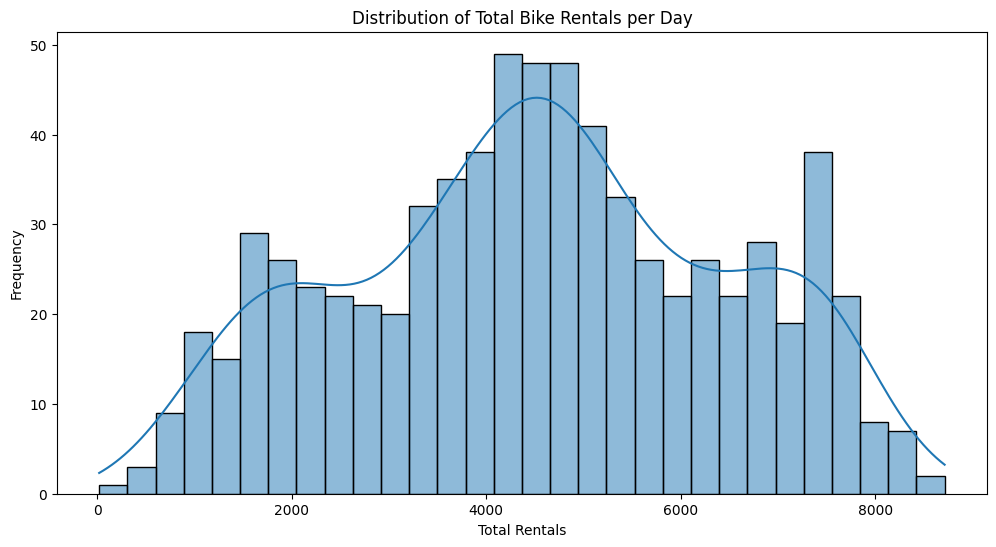

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title("Distribution of Total Bike Rentals per Day")
plt.xlabel("Total Rentals")
plt.ylabel("Frequency")
plt.show()

**Insight:**

Distribusi Penyewaan Sepeda
-  Terlihat pola jumlah penyewaan sepeda per hari, Jika distribusi condong ke kanan (right-skewed), berarti sebagian besar hari memiliki jumlah penyewaan yang lebih rendah, dengan beberapa hari mengalami lonjakan tinggi.

Identifikasi Tren
- Jika ada puncak yang signifikan, ini menunjukkan hari-hari tertentu dengan jumlah penyewaan yang tinggi.
- Jika distribusi memiliki dua puncak (bimodal), ini bisa menunjukkan ada perbedaan pola antara hari kerja dan akhir pekan.

In [17]:
hour_df['rental_range'] = pd.cut(hour_df['cnt'], bins=30)

rental_distribution = hour_df['rental_range'].value_counts().sort_index().reset_index()
rental_distribution.columns = ['Rental Range', 'Frequency']

print(rental_distribution)


          Rental Range  Frequency
0      (0.024, 33.533]       3964
1     (33.533, 66.067]       1652
2       (66.067, 98.6]       1356
3      (98.6, 131.133]       1313
4   (131.133, 163.667]       1208
5     (163.667, 196.2]       1184
6     (196.2, 228.733]       1030
7   (228.733, 261.267]        870
8     (261.267, 293.8]        759
9     (293.8, 326.333]        654
10  (326.333, 358.867]        514
11    (358.867, 391.4]        492
12    (391.4, 423.933]        389
13  (423.933, 456.467]        315
14    (456.467, 489.0]        293
15    (489.0, 521.533]        259
16  (521.533, 554.067]        200
17    (554.067, 586.6]        194
18    (586.6, 619.133]        147
19  (619.133, 651.667]        116
20    (651.667, 684.2]        106
21    (684.2, 716.733]         84
22  (716.733, 749.267]         64
23    (749.267, 781.8]         40
24    (781.8, 814.333]         58
25  (814.333, 846.867]         47
26    (846.867, 879.4]         34
27    (879.4, 911.933]         21
28  (911.933, 

**Insight:**
- Sebagian besar penyewaan sepeda per jam berada dalam rentang 50-300 sepeda, menunjukkan pola penggunaan yang umum
- Sebagian besar jam memiliki penyewaan sangat rendah, yaitu dalam rentang 0-33 sepeda (3964 jam).
- Pola distribusi menunjukkan sebagian besar waktu sepeda tidak banyak digunakan, tetapi ada beberapa puncak dengan penyewaan tinggi (kemungkinan saat jam sibuk seperti pagi dan sore hari).

In [18]:
all_df = pd.merge(
    left= day_df,
    right= hour_df,
    how ="left",
    left_on ="instant",
    right_on ="instant"
)
all_df.head()
print(all_df.columns)

Index(['instant', 'dteday_x', 'season_x', 'yr_x', 'mnth_x', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x', 'dteday_y',
       'season_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y', 'weekday_y',
       'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y', 'hum_y',
       'windspeed_y', 'casual_y', 'registered_y', 'cnt_y', 'rental_range'],
      dtype='object')


In [19]:
# mengelompokkan data berdasarkan hari dalam seminggu
grouped_weekday_all = all_df.groupby(['weekday_x']).agg({
    'casual_x': 'sum',
    'registered_x': 'sum',
    'cnt_x': 'sum'
})
print(grouped_weekday_all)

           casual_x  registered_x   cnt_x
weekday_x                                
0            140521        303506  444027
1             70784        384719  455503
2             57843        411266  469109
3             57319        415729  473048
4             61460        423935  485395
5             78238        409552  487790
6            153852        323955  477807


**Insight:**

- Hari kerja → lebih banyak pengguna terdaftar.

- Akhir pekan → lebih banyak pengguna casual ).

- Puncak penyewaan casual terjadi di hari Minggu

In [20]:
correlation_all = all_df[['cnt_x', 'season_x', 'temp_x', 'hum_x', 'windspeed_x', 'weathersit_x']].corr()
print(correlation_all)

                 cnt_x  season_x    temp_x     hum_x  windspeed_x  \
cnt_x         1.000000  0.406100  0.627494 -0.100659    -0.234545   
season_x      0.406100  1.000000  0.334315  0.205445    -0.229046   
temp_x        0.627494  0.334315  1.000000  0.126963    -0.157944   
hum_x        -0.100659  0.205445  0.126963  1.000000    -0.248489   
windspeed_x  -0.234545 -0.229046 -0.157944 -0.248489     1.000000   
weathersit_x -0.297391  0.019211 -0.120602  0.591045     0.039511   

              weathersit_x  
cnt_x            -0.297391  
season_x          0.019211  
temp_x           -0.120602  
hum_x             0.591045  
windspeed_x       0.039511  
weathersit_x      1.000000  


**Insight:**

- Faktor terbesar yang meningkatkan penyewaan sepeda adalah suhu tinggi dan musim tertentu (kemungkinan musim panas).
- Cuaca buruk, kelembaban tinggi, dan angin kencang cenderung mengurangi jumlah penyewaan sepeda.

In [21]:
#Mengelompokkan data berdasarkan musim
season_rentals_all = all_df.groupby(by="season_x").instant.nunique().sort_values(ascending=False)
print(season_rentals_all)

season_x
3    188
2    184
1    181
4    178
Name: instant, dtype: int64


- Ini menunjukkan bahwa musim panas adalah periode dengan lebih banyak data pencatatan penyewaan sepeda.

In [22]:
monthly_rentals_all = all_df.groupby(by="mnth_x")['cnt_x'].sum()
print(monthly_rentals_all)

mnth_x
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt_x, dtype: int64


- Penyewaan tertinggi terjadi pada bulan 6, 7, 8, dan 9 (musim panas).
- Penyewaan terendah terjadi pada bulan 1 dan 2 (musim dingin), kemungkinan karena cuaca yang kurang mendukung.
- Membuktikan bahwa musim memiliki dampak besar terhadap jumlah penyewaan sepeda.

In [31]:
#Mengelompokkan data berdasarkan kondisi cuaca
weather_rentals_all = all_df.groupby(by="weathersit_x").instant.nunique().sort_values(ascending=False)
print(weather_rentals_all)

weathersit_x
1    463
2    247
3     21
Name: instant, dtype: int64


- Menunjukkan bahwa mayoritas penyewaan terjadi saat cuaca cerah, sementara saat hujan lebih sedikit data yang tercatat.

## Visualization & Explanatory Analysis

### Pertanyaan 1. Bagaimana pola penggunaan sepeda berdasarkan waktu (Weakday dan hour)?

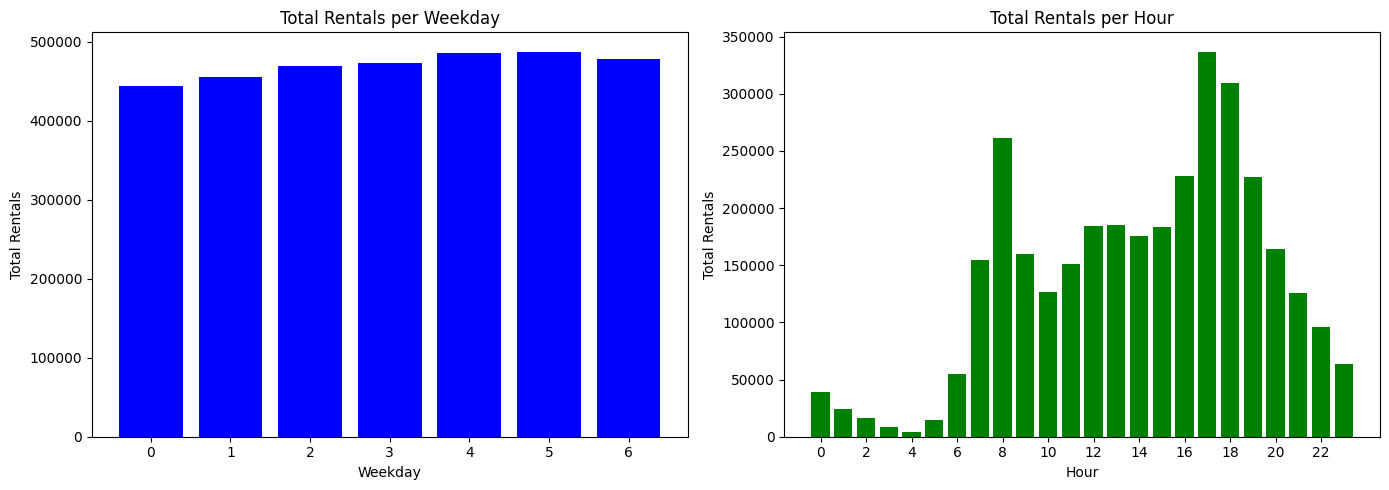

In [24]:
import matplotlib.pyplot as plt


rentals_per_day = day_df.groupby('weekday')['cnt'].sum()
rentals_per_hour = hour_df.groupby('hr')['cnt'].sum()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(rentals_per_day.index, rentals_per_day.values, color='b')
axes[0].set_title("Total Rentals per Weekday")
axes[0].set_xlabel("Weekday")
axes[0].set_ylabel("Total Rentals")
axes[0].set_xticks(range(7))


axes[1].bar(rentals_per_hour.index, rentals_per_hour.values, color='g')
axes[1].set_title("Total Rentals per Hour")
axes[1].set_xlabel("Hour")
axes[1].set_ylabel("Total Rentals")
axes[1].set_xticks(range(0, 24, 2))

# Menampilkan grafik
plt.tight_layout()
plt.show()


Ket
- Grafik pertama (kiri): Menampilkan jumlah penyewaan sepeda berdasarkan hari dalam seminggu.
- Grafik kedua (kanan): Menampilkan jumlah penyewaan sepeda berdasarkan jam dalam sehari.

**insight**

- Pola Harian: Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, kemungkinan karena banyak digunakan untuk keperluan komuter.
- Pola Per Jam: Puncak penyewaan terjadi pada jam sibuk (sekitar pagi dan sore hari), menunjukkan bahwa sepeda banyak digunakan untuk perjalanan kerja/sekolah.
- Pola Waktu: Penyewaan menurun di malam hari dan dini hari, menandakan penggunaan sepeda lebih sedikit di luar jam aktivitas utama.

### Pertanyaan 2. Apa Hubungan antara Jumlah Penyewaan Sepeda dan Faktor Demografis Pengguna setiap hari dalam seminggu?

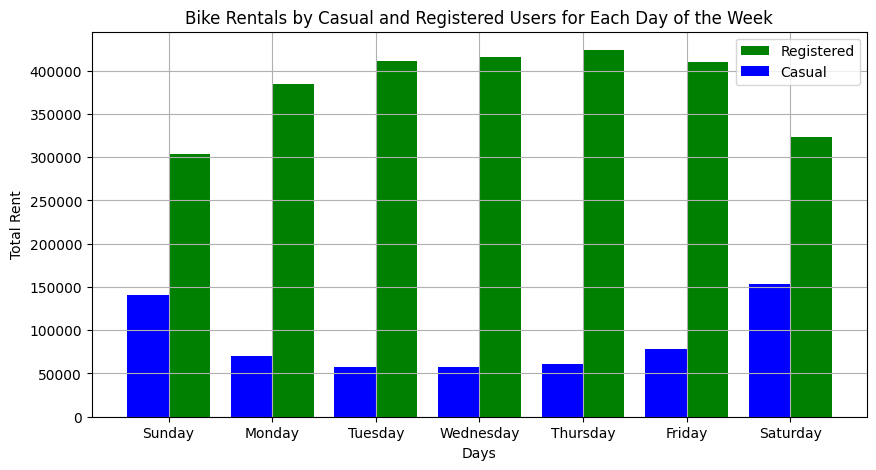

In [25]:
daily_rent_df = all_df.groupby(['weekday_x']).agg({
    'casual_x': 'sum',
    'registered_x': 'sum',
    'cnt_x': 'sum'
})

day_names = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
             4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
daily_rent_df.index = daily_rent_df.index.map(day_names)

daily_rent_df = daily_rent_df.reset_index()

x = np.arange(len(daily_rent_df))
days = daily_rent_df['weekday_x']

plt.figure(figsize=(10, 5))
plt.bar(x + 0.2, daily_rent_df['registered_x'], width=0.4, label='Registered', color='green')
plt.bar(x - 0.2, daily_rent_df['casual_x'], width=0.4, label='Casual', color='blue')
plt.xlabel('Days')
plt.ylabel('Total Rent')
plt.title('Bike Rentals by Casual and Registered Users for Each Day of the Week')
plt.xticks(ticks=x, labels=days)
plt.legend()
plt.grid(True)
plt.show()

**insight:**

- Pengguna Terdaftar vs Kasual: Penyewa terdaftar (registered) secara konsisten lebih banyak dibandingkan penyewa kasual, menunjukkan bahwa layanan sepeda lebih banyak digunakan oleh pelanggan tetap.
- Pola Harian: Penyewaan tertinggi terjadi pada hari kerja, terutama oleh pengguna terdaftar, yang kemungkinan besar menggunakan sepeda untuk keperluan komuter.
- Akhir Pekan: Pengguna kasual meningkat pada akhir pekan, menunjukkan bahwa mereka lebih banyak menggunakan sepeda untuk rekreasi dibandingkan keperluan sehari-hari.
- Hari dengan Penyewaan Terbanyak: Biasanya terjadi pada pertengahan minggu (Selasa-Kamis) untuk pengguna terdaftar, sedangkan pengguna kasual lebih banyak di Sabtu/Minggu.

### Pertanyaan 3. Pada Bulan Apa terjadinya peningkatan penyewaan sepeda dan apakah cuaca cukup berperan?

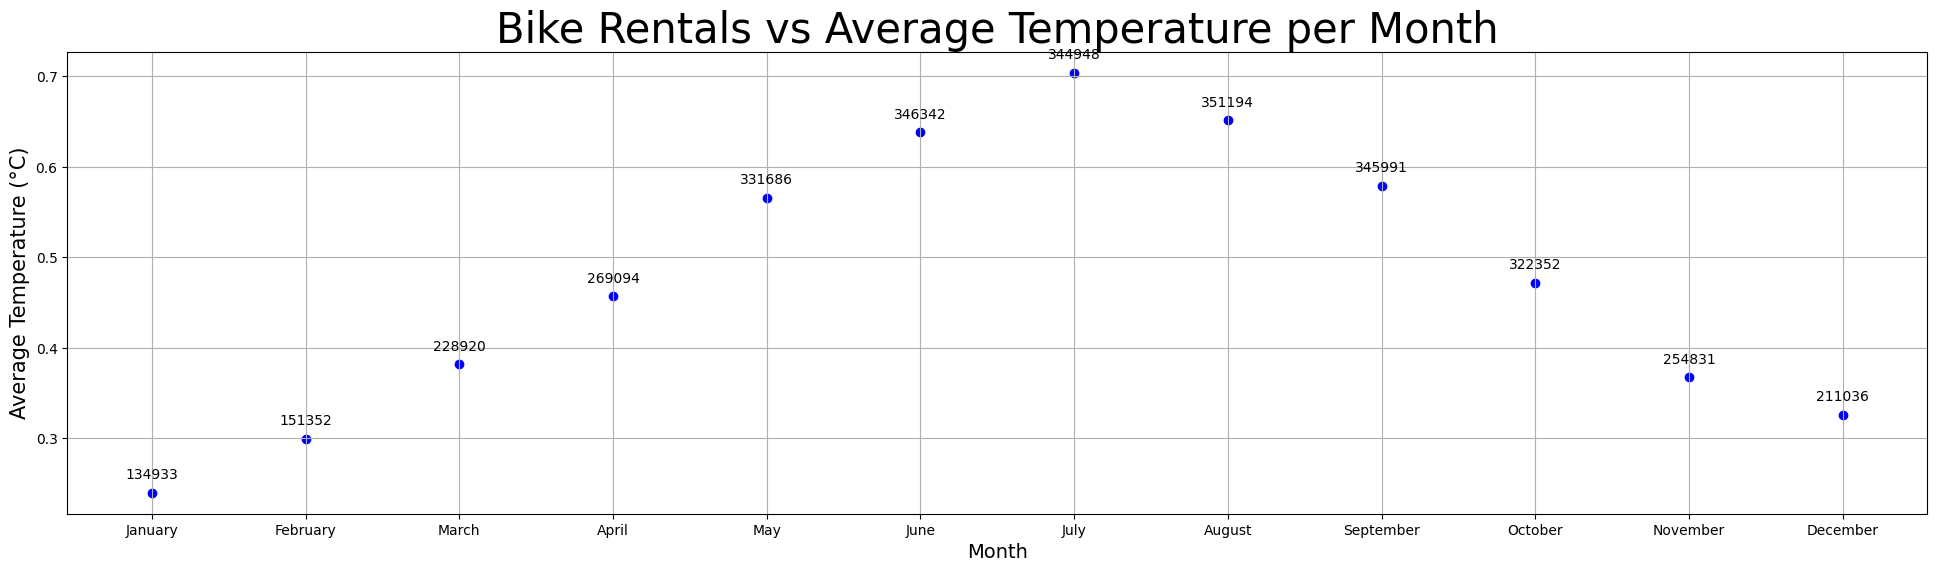

In [26]:
monthly_rent_df = all_df.groupby('mnth_x')['cnt_x'].sum().reset_index()
monthly_weather_df = all_df.groupby('mnth_x').agg({
    'atemp_x': 'mean',
    'hum_x': 'mean'
}).reset_index()

monthly_summary_df = pd.merge(monthly_rent_df, monthly_weather_df, on='mnth_x')

month_names = {
    1: 'January', 2: 'February', 3: 'March',
    4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September',
    10: 'October', 11: 'November', 12: 'December'
}

monthly_summary_df['month_name'] = monthly_summary_df['mnth_x'].map(month_names)

plt.figure(figsize=(24, 6))
plt.scatter(monthly_summary_df['month_name'], monthly_summary_df['atemp_x'], color='blue')
plt.title("Bike Rentals vs Average Temperature per Month", fontsize=30)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Temperature (°C)", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

for i, row in monthly_summary_df.iterrows():
    plt.annotate(row['cnt_x'], (row['month_name'], row['atemp_x']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

**insight**
- Peningkatan Penyewaan terjadi pada bulan Mei hingga September, menunjukkan musim panas sebagai periode dengan penggunaan sepeda tertinggi.
  dan pada bulan juli merupakan paling banyak untuk orang melakukan penyewaan sepeda
- Cuaca Berpengaruh: Semakin tinggi suhu rata-rata, semakin banyak sepeda yang disewa.
- Penurunan di Musim Dingin: Penyewaan menurun pada bulan November - Februari, kemungkinan karena suhu lebih dingin dan kondisi cuaca kurang mendukung.

### Pertanyaan 4. Bagaimana distribusi penyewaan sepeda berdasarkan rentang suhu?

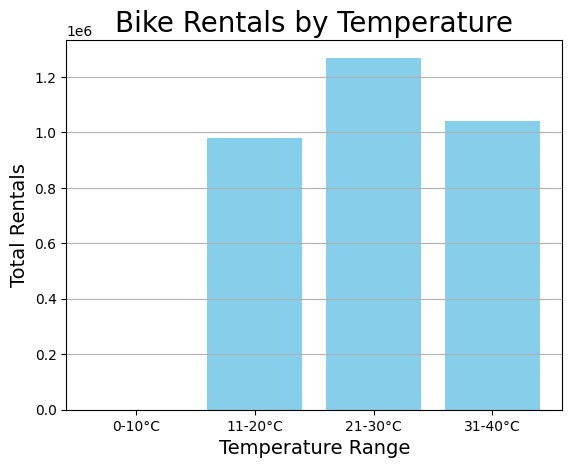

In [27]:
bins = [0, 10, 20, 30, 40]
labels = ['0-10°C', '11-20°C', '21-30°C', '31-40°C']

monthly_summary_df['temp_bin'] = pd.cut(monthly_summary_df['atemp_x'] * 50, bins=bins, labels=labels)
binned_rentals = monthly_summary_df.groupby('temp_bin', observed=False)['cnt_x'].sum().reset_index()

plt.bar(binned_rentals['temp_bin'], binned_rentals['cnt_x'], color='skyblue')
plt.title('Bike Rentals by Temperature', fontsize=20)
plt.xlabel('Temperature Range', fontsize=14)
plt.ylabel('Total Rentals', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y')

plt.show()

**insight**

- Suhu Lebih Tinggi = Lebih Banyak Penyewaan: Penyewaan sepeda meningkat pada rentang suhu 11-30°C, menunjukkan bahwa cuaca hangat lebih mendukung aktivitas bersepeda.
- Penyewaan Rendah pada Suhu Ekstrem: Pada suhu 0-10°C dan di atas 30°C, jumlah penyewaan menurun, kemungkinan karena kondisi terlalu dingin atau terlalu panas tidak nyaman untuk bersepeda.

## Conclusion

- 1.Bagaimana pola penggunaan sepeda berdasarkan waktu (harian dan jam)?

  Pola penggunaan sepeda menunjukkan bahwa jumlah penyewaan meningkat pada hari kerja, terutama oleh pengguna terdaftar. Lonjakan signifikan terjadi pada jam-jam sibuk, yaitu pagi hari antara pukul 07:00-09:00 dan sore hari antara pukul 17:00-19:00. Hal ini mengindikasikan bahwa sepeda digunakan sebagai moda transportasi utama untuk berangkat dan pulang kerja. Sebaliknya, pada akhir pekan, penggunaan sepeda lebih banyak berasal dari pengguna kasual, yang kemungkinan besar menggunakan sepeda untuk aktivitas rekreasi.

- 2.Apa hubungan antara jumlah penyewaan sepeda dan faktor demografis pengguna setiap hari dalam seminggu?

  Data menunjukkan bahwa pengguna terdaftar lebih dominan dalam penyewaan sepeda dibandingkan pengguna kasual, terutama pada hari kerja. Sementara itu, jumlah penyewaan oleh pengguna kasual mengalami peningkatan pada akhir pekan. Puncak penyewaan terjadi pada hari Kamis dan Jumat, baik untuk pengguna terdaftar maupun kasual. Hal ini dapat mengindikasikan bahwa pengguna kasual lebih aktif dalam menggunakan sepeda menjelang akhir pekan, sementara pengguna terdaftar tetap memiliki pola penggunaan yang stabil selama hari kerja.

- 3.Pada bulan apa terjadinya peningkatan penyewaan sepeda dan apakah cuaca cukup berperan?

  Penyewaan sepeda mengalami peningkatan mulai bulan Maret hingga September, dengan puncaknya terjadi pada bulan Juni hingga Agustus. Faktor cuaca memainkan peran penting dalam tren ini, di mana jumlah penyewaan cenderung lebih tinggi pada bulan dengan suhu yang nyaman, tidak terlalu panas maupun dingin. Sebaliknya, pada bulan-bulan dengan suhu ekstrem seperti musim dingin, penyewaan sepeda mengalami penurunan yang cukup signifikan.

- 4.Bagaimana distribusi penyewaan sepeda berdasarkan rentang suhu?

  Penyewaan sepeda tertinggi terjadi pada rentang suhu 11-30°C, yang dianggap sebagai kondisi optimal untuk bersepeda. Saat suhu berada di bawah 10°C atau di atas 30°C, jumlah penyewaan menurun drastis, menunjukkan bahwa kondisi ekstrem kurang mendukung aktivitas bersepeda. Hal ini mengonfirmasi bahwa suhu yang nyaman memiliki korelasi positif terhadap peningkatan jumlah penyewaan sepeda.

In [28]:
all_df.to_csv("all_data.csv", index=False)

In [29]:
import os
os.getcwd()

'D:\\submission'